In [4]:
from sklearn import datasets
import numpy as np
import pandas as pd

iris=datasets.load_iris()

print(iris.target_names)

X= iris.data[:,[0,2]]
Y= iris.target

print(X.shape)

['setosa' 'versicolor' 'virginica']
(150, 2)


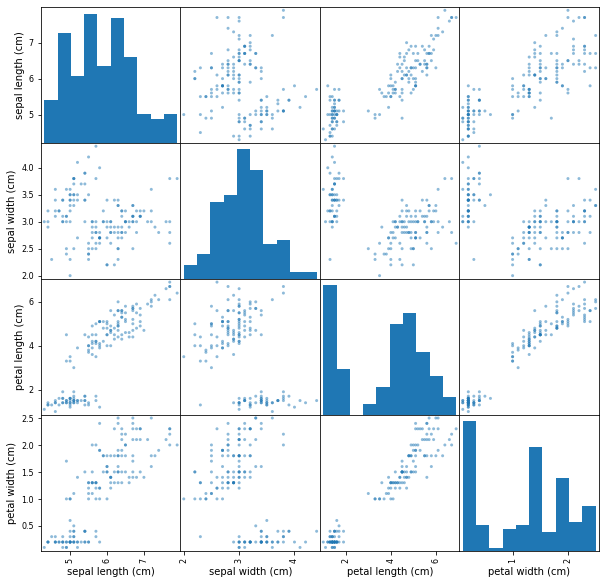

In [7]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
scatter_matrix(df_iris,figsize=(10,10))
plt.show()

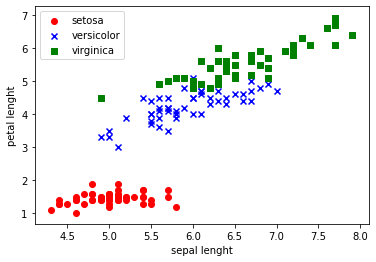

In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

plt.scatter(X[:50,0], X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0], X[50:100,1],color='blue',marker='x',label='versicolor')
plt.scatter(X[100:150,0], X[100:150,1],color='green',marker='s',label='virginica')

plt.xlabel('sepal lenght')
plt.ylabel('petal lenght')
plt.legend(loc='upper left')

plt.show()

In [0]:
from sklearn.linear_model import Perceptron



ppn = Perceptron(max_iter = 40, eta0=0.001, random_state=0)
ppn.fit(X,Y)

fail=0
for i in range(150):
  if Y[i] != ppn.predict(X[i].reshape(1,2)):
    fail +=1
fails=(fail/150)*100
print('non classifie = ',fails)
print('classifier correctement =', 100-fails)

non classifie =  14.000000000000002
classifier correctement = 86.0


In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split



X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_train.shape); print(X_test.shape)

mlp = MLPClassifier(hidden_layer_sizes=(128,64), activation='relu', solver="lbfgs", max_iter=100, random_state=0, learning_rate_init=0.1)

#mlp = MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=40, alpha=1e-4, random_state=0, solver="sgd",verbose = True)
mlp.fit(X_train,Y_train)

#For this TP
#mlp2=MLPClassifier(hidden_layer_sizes=(5,2), activation='relu', max_iter=400, alpha=1e-4, random_state=0, solver="sgd")
#mlp2.fit(X,Y)


predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)



(120, 2)
(30, 2)


In [0]:
from sklearn.metrics import classification_report,confusion_matrix


print("TRAIN SCORE :")
print(confusion_matrix(Y_train,predict_train))
print(classification_report(Y_train,predict_train))

print("###########################################""")

print("TEST SCORE :")
print(confusion_matrix(Y_test,predict_test))
print(classification_report(Y_test,predict_test))


TRAIN SCORE :
[[41  0  0]
 [ 0 38  3]
 [ 0  2 36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       0.95      0.93      0.94        41
           2       0.92      0.95      0.94        38

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120

###########################################
TEST SCORE :
[[ 9  0  0]
 [ 0  9  0]
 [ 0  0 12]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

